In [2]:
import re

def contract_name(name, threshold=20):
    if len(name) > threshold:
        return re.sub('[^A-Z_]', '', name)
    else:
        return name

# KV Caching

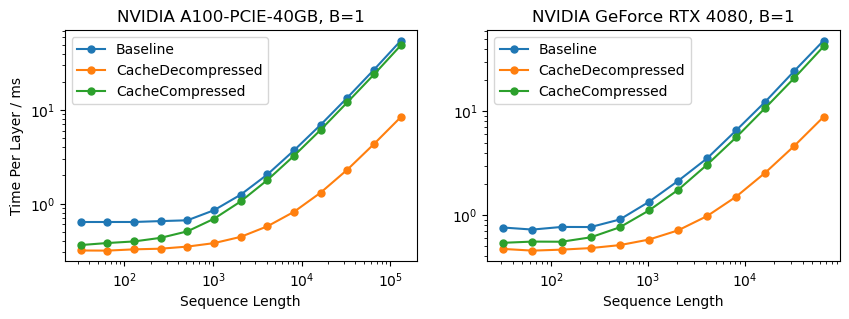

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('caching.csv')
# bench_items = dataset['bench'].unique()
bench_items = ['Baseline', 'CacheDecompressed', 'CacheCompressed']
devices = dataset['device_name'].unique()

fig, axs = plt.subplots(1, len(devices), figsize=(10, 3))

for idx, device in enumerate(devices):
    ax = axs[idx]
    devds = dataset[dataset['device_name'] == device]

    # set figure size
    ax.set_xscale('log')
    ax.set_yscale('log')
    for bench in bench_items:
        ds = devds[devds['bench'] == bench]
        ax.plot(ds['kv_len'], ds['mean'] * 1000, label=contract_name(bench), marker='o', markersize=5, markeredgewidth=1)
    ax.set_xlabel('Sequence Length')
    if idx == 0:
        ax.set_ylabel('Time Per Layer / ms')
    ax.set_title(f'{device}, B=1')
    ax.legend()

# plt.tight_layout(pad=0.1)
plt.savefig('caching-B1.png', bbox_inches='tight')


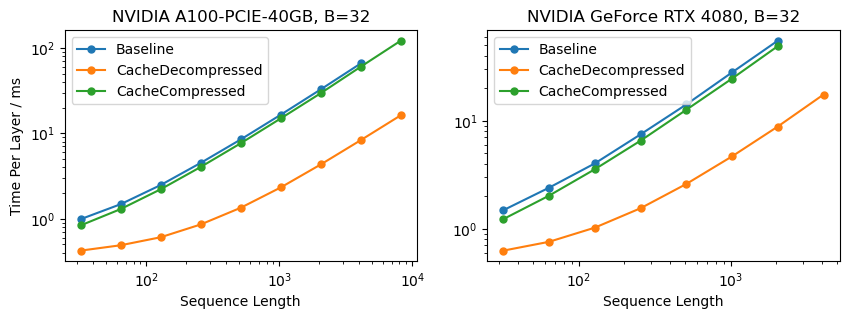

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('caching-32.csv')
# bench_items = dataset['bench'].unique()
bench_items = ['Baseline', 'CacheDecompressed', 'CacheCompressed']
devices = dataset['device_name'].unique()

fig, axs = plt.subplots(1, len(devices), figsize=(10, 3))

for idx, device in enumerate(devices):
    ax = axs[idx]
    devds = dataset[dataset['device_name'] == device]

    # set figure size
    ax.set_xscale('log')
    ax.set_yscale('log')
    for bench in bench_items:
        ds = devds[devds['bench'] == bench]
        ax.plot(ds['kv_len'], ds['mean'] * 1000, label=contract_name(bench), marker='o', markersize=5, markeredgewidth=1)
    ax.set_xlabel('Sequence Length')
    if idx == 0:
        ax.set_ylabel('Time Per Layer / ms')
    ax.set_title(f'{device}, B=32')
    ax.legend()

plt.savefig('caching-B32.png', bbox_inches='tight')

# Projection Absorption

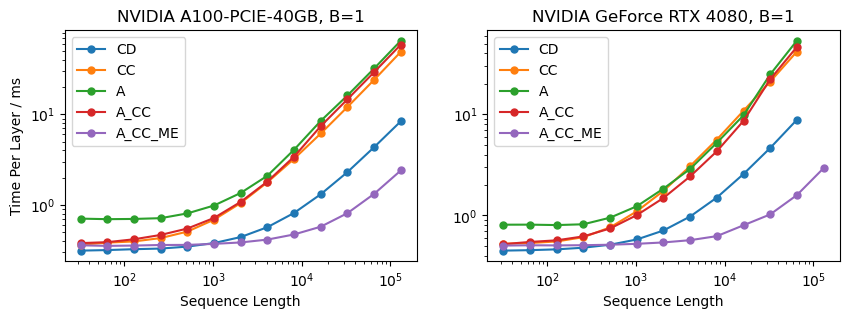

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('absorption.csv')
bench_items = dataset['bench'].unique()
devices = dataset['device_name'].unique()

fig, axs = plt.subplots(1, len(devices), figsize=(10, 3))

for idx, device in enumerate(devices):
    ax = axs[idx]
    devds = dataset[dataset['device_name'] == device]

    # set figure size
    ax.set_xscale('log')
    ax.set_yscale('log')
    for bench in bench_items:
        ds = devds[devds['bench'] == bench]
        ax.plot(ds['kv_len'], ds['mean'] * 1000, label=contract_name(bench, 0), marker='o', markersize=5, markeredgewidth=1)
    ax.set_xlabel('Sequence Length')
    if idx == 0:
        ax.set_ylabel('Time Per Layer / ms')
    ax.set_title(f'{device}, B=1')
    ax.legend()

# plt.tight_layout(pad=0.1)
plt.savefig('absorption-B1.png', bbox_inches='tight')

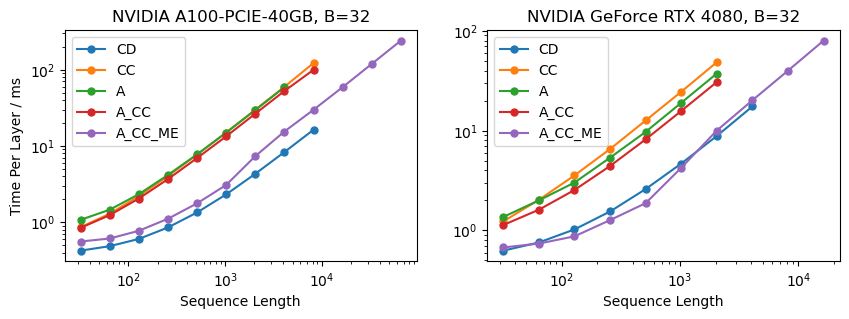

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('absorption-32.csv')
bench_items = dataset['bench'].unique()
devices = dataset['device_name'].unique()

fig, axs = plt.subplots(1, len(devices), figsize=(10, 3))

for idx, device in enumerate(devices):
    ax = axs[idx]
    devds = dataset[dataset['device_name'] == device]

    # set figure size
    ax.set_xscale('log')
    ax.set_yscale('log')
    for bench in bench_items:
        ds = devds[devds['bench'] == bench]
        ax.plot(ds['kv_len'], ds['mean'] * 1000, label=contract_name(bench, 0), marker='o', markersize=5, markeredgewidth=1)
    ax.set_xlabel('Sequence Length')
    if idx == 0:
        ax.set_ylabel('Time Per Layer / ms')
    ax.set_title(f'{device}, B=32')
    ax.legend()

# plt.tight_layout(pad=0.1)
plt.savefig('absorption-B32.png', bbox_inches='tight')